## Mini Project III

In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.cluster import DBSCAN

In [377]:
customerInformation = pd.read_csv('twm_customer.csv',sep=";")
accountInformation = pd.read_csv('twm_accounts.csv', sep=";")
transactionsInformation = pd.read_csv('twm_transactions.csv', sep=";")

In [378]:
dfIncomeDroppedUnderAged['stateCodeAverage'] = dfIncomeDroppedUnderAged.groupby('state_code')['income'].transform('mean')

<AxesSubplot:xlabel='state_code'>

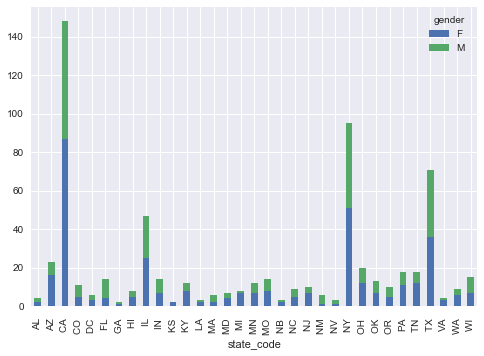

In [ ]:
dfIncomeDroppedUnderAged.groupby(['state_code', 'gender']).size().unstack().plot(kind='bar', stacked=True)

In [ ]:
dfIncomeDroppedUnderAged['income'].describe()

count       645.000000
mean      26322.520930
std       21829.191959
min        1039.000000
25%       10818.000000
50%       20184.000000
75%       35237.000000
max      144157.000000
Name: income, dtype: float64

In [ ]:
def ageClassfier(row):
    if(row['age'] < 34):
        return 'AgeGroupA'
    elif (row['age'] < 46):
        return 'AgeGroupB'
    elif(row['age'] < 58):
        return 'AgeGroupC'
    else:
        return 'AgeGroupD'

In [ ]:
def incomeClassifier(row):
    if(row['income'] < 10818):
        return 'IncomeGroupA'
    elif (row['income'] < 20184):
        return 'IncomeGroupB'
    elif(row['income'] < 35237):
        return 'IncomeGroupC'
    else:
        return 'IncomeGroupD'

In [ ]:
dfIncomeDroppedUnderAged['classifier'] = dfIncomeDroppedUnderAged.apply(ageClassfier,axis=1)

In [ ]:
dfIncomeDroppedUnderAged['incomeClassifier']= dfIncomeDroppedUnderAged.apply(incomeClassifier,axis=1)

<AxesSubplot:xlabel='state_code'>

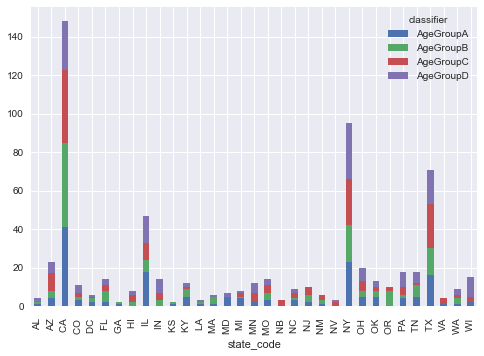

In [ ]:
dfIncomeDroppedUnderAged.groupby(['state_code', 'classifier']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='state_code'>

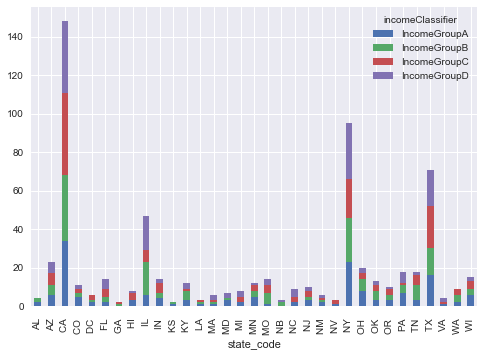

In [ ]:
dfIncomeDroppedUnderAged.groupby(['state_code', 'incomeClassifier']).size().unstack().plot(kind='bar', stacked=True)

In [ ]:
dfIncomeDroppedUnderAged.groupby(['state_code']).income.mean

In [ ]:
customerInformation.groupby(['state_code', 'gender'])['income'].mean()

state_code  gender
AL          F         11890.500000
            M         12119.000000
AZ          F         18981.625000
            M         31687.750000
CA          F         20085.373832
                          ...     
VA          M         86744.000000
WA          F         20018.333333
            M         16489.000000
WI          F         13397.142857
            M         27636.625000
Name: income, Length: 66, dtype: float64

In [ ]:
dfIncomeDroppedUnderAged = customerInformation.drop(customerInformation[customerInformation.income == 0].index)

In [ ]:
description = dfIncomeDroppedUnderAged.income.describe()

In [ ]:
plt.scatter(x, y, marker='o')

<BarContainer object of 666 artists>

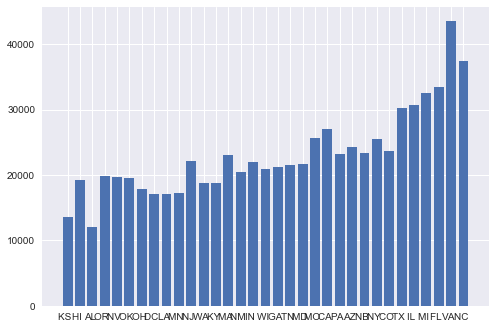

In [ ]:
plt.bar(dfIncomeDroppedUnderAged['state_code'],dfIncomeDroppedUnderAged['stateCodeAverage'])

In [ ]:
transactionsInformation.merge()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


In [ ]:
transactionsDataFrame = transactionsInformation[['acct_nbr',"tran_amt"]].groupby('acct_nbr').mean().sort_values(by='tran_amt')

In [ ]:
transactionsDataFrame['numberOfTransactions'] = transactionsInformation.acct_nbr.value_counts()

In [ ]:
transactionsDataFrame.describe()

,tran_amt,numberOfTransactions
count,1398.000000,1398.000000
mean,12.627973,55.493562
std,279.413091,33.295895
min,-351.851852,1.000000
25%,-19.244820,26.000000
50%,-1.711149,45.000000
75%,7.776392,99.000000
max,8735.140000,155.000000


In [ ]:
transactionsDataFrame.sort_values(by=["tran_amt","numberOfTransactions"], ascending=[False,False])

,tran_amt,numberOfTransactions
acct_nbr,,
4561143213632370,8735.140000,1
4561143213626190,3905.040000,1
4561143213631460,2814.610000,1
4561143213631690,1749.600000,1
4561143213631330,1675.890000,1
...,...,...
4561143213633110,-225.000000,12
4561143213629170,-261.538462,26
4561143213628320,-293.103448,29


In [ ]:
X = transactionsDataFrame[['tran_amt','numberOfTransactions']]

In [ ]:
z_scores = np.abs(stats.zscore(X.values))

In [ ]:
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

new_df = X[filtered_entries]

In [ ]:
print(new_df.values)

[[  27.         -351.85185185]
 [  28.         -328.57142857]
 [  29.         -293.10344828]
 ...
 [   6.          422.78666667]
 [  20.          440.        ]
 [   8.          563.9525    ]]


Text(0, 0.5, 'Number of Transactions this person has done')

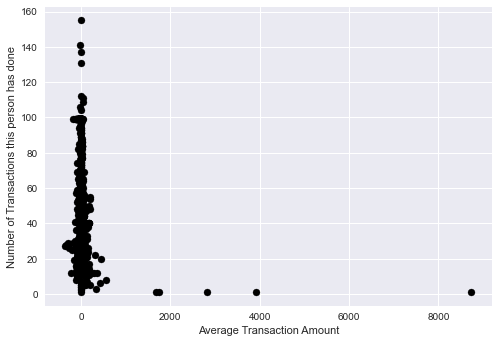

In [ ]:
plt.scatter(transactionsDataFrame['tran_amt'],transactionsDataFrame['numberOfTransactions'],c='black')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Number of Transactions this person has done')

In [ ]:
z_scores = sts.zscore(X.values)

In [ ]:
z_scores

array([-1.30491471, -1.22156588, -1.09458302, ..., 10.03168713,
       13.9356567 , 31.22843429])

In [ ]:
new_df

,numberOfTransactions,tran_amt
acct_nbr,,
4561143213625620,27,-351.851852
4561143213625690,28,-328.571429
4561143213628320,29,-293.103448
4561143213629170,26,-261.538462
4561143213633110,12,-225.000000
...,...,...
4561143213629300,3,343.176667
4561143213629090,12,345.994167
4561143213628090,6,422.786667


In [397]:
len(new_df)

1393

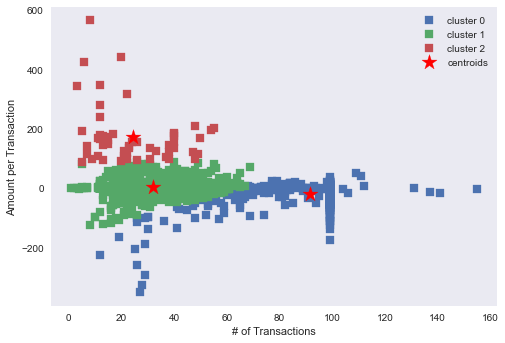

In [394]:
plot_clusters(new_df.values,y_km,"# of Transactions","Amount per Transaction",True)

In [382]:
new_df['kmean'].value_counts().sort_index()

0    561
1    778
2     54
Name: kmean, dtype: int64

1393

In [ ]:
y_km = km.fit_predict(new_df)

In [384]:
testModel = km.fit(new_df)
new_df['kmean'] = testModel.labels_

<ipython-input-384-2028499b9a0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['kmean'] = testModel.labels_


In [391]:
 def plot_clusters(X,y_res,xLabel,yLabel, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.legend()
    plt.grid()
    plt.show()

In [297]:
features = list(transactionsInformation.columns)[:-2]

In [298]:
X = transactionsDataFrame[['numberOfTransactions','tran_amt']]

In [415]:
km = KMeans(n_clusters=4,
            n_init=10,
            random_state=0)

(1398, 4)

In [44]:
def plot_distortions(X,max_clusters=10):
    distortions = []
    for i in range(1,max_clusters+1):
        km = KMeans(n_clusters=i,init="k-means++",n_init=10,random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
    
    plt.plot(range(1,max_clusters+1),distortions,marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortions')
    plt.show()

In [231]:
customerAge_Income = dfIncomeDroppedUnderAged[['age','income']]

C:\Users\Jimmy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


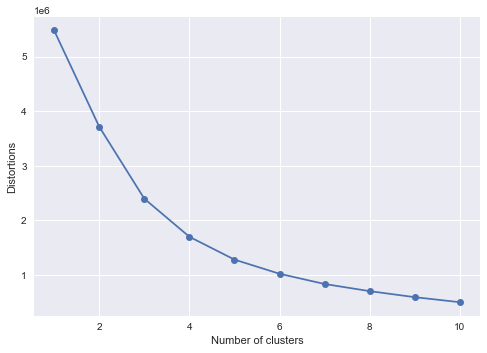

In [395]:
plot_distortions(new_df,10)

In [47]:
def plot_clusters(X,y_res,plt_cluster_centers=False):
    X_centroids = []
    Y_centroids = []


    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,y,s=50,marker='s',label=f'cluster{cluster}')
    
    if plt_cluster_centers:
        plt.scatter(X_centroids,Y_centroids,marker='*',c='red',s=250,label='centroids')

    plt.legend()
    plt.grid()
    plt.show()


In [416]:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [50]:
plt.style.use('seaborn')

In [51]:
customerInformation.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
50,1362729,0,13,5,0,M,1,,Bruce ...,Kraus ...,1223,Vine ...,10104,New York City,NY
51,1362668,0,13,5,0,M,1,,Chiman ...,Boyd ...,16437,37th ...,90750,Long Beach,CA
91,1362523,0,13,5,0,F,1,,Julie ...,Morton ...,8369,Madison ...,90061,Los Angeles,CA
202,1362496,0,13,2,0,M,1,,Douglas ...,McMillen ...,2968,Leek ...,77058,Houston,TX
265,1363064,0,13,5,0,F,1,,Isabel ...,Gold ...,7879,Third ...,14622,Rochester,NY


In [52]:
customerInformation = customerInformation.sort_values(by=['age','income'])

<BarContainer object of 666 artists>

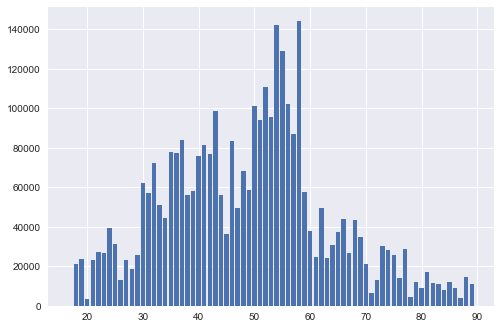

In [126]:
plt.bar(dfIncomeDroppedUnderAged['age'],dfIncomeDroppedUnderAged['income'])

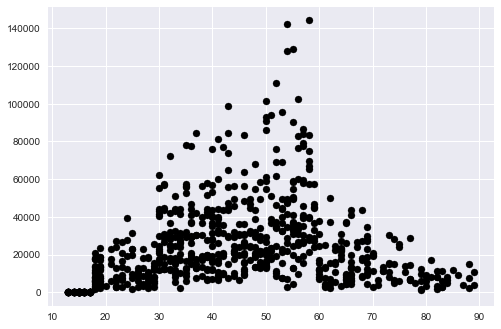

In [54]:
plt.scatter(customerInformation['age'],customerInformation['income'],c='black')

<BarContainer object of 747 artists>

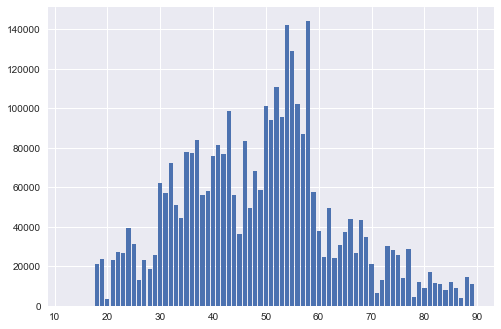

In [55]:
plt.bar(customerInformation['age'],customerInformation['income'])

In [56]:
accountCustomerInformation = customerInformation.merge(accountInformation,on="cust_id")

In [57]:
accountCustomerInformation.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,...,postal_code,city_name,state_code,acct_nbr,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362729,0,13,5,0,M,1,,Bruce ...,Kraus ...,...,10104,New York City,NY,13627293,SV,Y,21.4.1993,NaN,120.41,122.21
1,1362668,0,13,5,0,M,1,,Chiman ...,Boyd ...,...,90750,Long Beach,CA,13626683,SV,Y,29.11.1990,NaN,213.91,1470.67
2,1362523,0,13,5,0,F,1,,Julie ...,Morton ...,...,90061,Los Angeles,CA,13625233,SV,Y,26.6.1992,NaN,262.21,127.38
3,1362496,0,13,2,0,M,1,,Douglas ...,McMillen ...,...,77058,Houston,TX,13624963,SV,Y,7.12.1994,NaN,247.34,251.06
4,1363064,0,13,5,0,F,1,,Isabel ...,Gold ...,...,14622,Rochester,NY,13630643,SV,Y,9.6.1995,NaN,220.97,1103.03


In [58]:
accountCustomerInformation.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,...,postal_code,city_name,state_code,acct_nbr,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362729,0,13,5,0,M,1,,Bruce ...,Kraus ...,...,10104,New York City,NY,13627293,SV,Y,21.4.1993,NaN,120.41,122.21
1,1362668,0,13,5,0,M,1,,Chiman ...,Boyd ...,...,90750,Long Beach,CA,13626683,SV,Y,29.11.1990,NaN,213.91,1470.67
2,1362523,0,13,5,0,F,1,,Julie ...,Morton ...,...,90061,Los Angeles,CA,13625233,SV,Y,26.6.1992,NaN,262.21,127.38
3,1362496,0,13,2,0,M,1,,Douglas ...,McMillen ...,...,77058,Houston,TX,13624963,SV,Y,7.12.1994,NaN,247.34,251.06
4,1363064,0,13,5,0,F,1,,Isabel ...,Gold ...,...,14622,Rochester,NY,13630643,SV,Y,9.6.1995,NaN,220.97,1103.03


In [59]:
accountInformation.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [60]:
accountInformation

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28
...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,CC,N,20.1.1992,19.8.1995,1433.94,20.00
1405,4561143213626240,1362624,CC,Y,29.11.1990,NaN,632.75,1400.00
1406,4561143213628750,1362875,CC,Y,24.2.1989,NaN,2810.91,3000.00
1407,13626543,1362654,SV,Y,17.10.1992,NaN,784.53,622.46
